<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/PW_02/PW_02_Gadilshina_Valentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2. Парсинг HTML. BeautifulSoup

**Цель практической работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки финансовой и экономической информации.

**Общие требования к заданию.**
1. Использовать Python 3 и библиотеку BeautifulSoup4 для парсинга данных.
2. Собрать данные с одного или нескольких предложенных источников.
3. Проанализировать собранные данные и представить результаты в виде графиков или
таблиц.
4. Составить отчет, содержащий код, результаты и анализ

In [1]:
#1. Установка необходимых библиотек:
!pip install requests beautifulsoup4 pandas matplotlib


In [2]:
#2. Импортирование библиотек python
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#3. Получение HTML-кода страницы.
url = 'https://finance.yahoo.com/markets/stocks/most-active/'
response = requests.get(url)
page_content = response.content

In [10]:
#4. Парсинг HTML с помощью BeautifulSoup.
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find(id="nimbus-app") # Ищем таблицу с id='unique_id'
rows = table.find_all('tr')

In [36]:
import re

In [49]:
#5. Извлечение данных и создание DataFrame.
data = []
for row in rows[1:]:  # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)
column_names = [ele.text.strip() for ele in rows[0].find_all('th')]
df = pd.DataFrame(data, columns=column_names)

# Заменяем '-' на NaN, чтобы избежать ошибок при преобразовании
df.replace('-', np.nan, inplace=True)
df

,Symbol,Price,Change,Change %,Volume,Avg Vol (3M),Market Cap,P/E Ratio (TTM),52 Wk Change %,52 Wk Range,Day Chart
0,NVDA NVIDIA Corporation,138.00 +1.07 (+0.78%),+1.07,+0.78%,169.234M,324.87M,3.385T,64.49,221.12%,,
1,"LCID Lucid Group, Inc.",2.6300 -0.0600 (-2.23%),-0.0600,-2.23%,80.877M,36.214M,6.877B,NaN,-39.40%,,
2,NIO NIO Inc.,5.22 +0.07 (+1.36%),+0.07,+1.36%,66.524M,62.896M,11.442B,NaN,-31.23%,,
3,NOK Nokia Oyj,4.7500 +0.4100 (+9.45%),+0.4100,+9.45%,51.206M,17.833M,25.868B,27.94,50.32%,,
4,"TSLA Tesla, Inc.",220.70 -0.19 (-0.09%),-0.19,-0.09%,49.612M,80.743M,705.057B,62.17,4.06%,,
5,OKLO Oklo Inc.,18.23 +2.50 (+15.89%),+2.50,+15.89%,48.711M,5.691M,2.226B,NaN,76.65%,,
6,"MARA MARA Holdings, Inc.",18.88 +0.87 (+4.83%),+0.87,+4.83%,47.506M,35.713M,5.56B,20.98,115.77%,,
7,AAPL Apple Inc.,235.00 +2.85 (+1.23%),+2.85,+1.23%,46.431M,51.191M,3.573T,35.71,35.84%,,
8,DNN Denison Mines Corp.,2.3800 +0.1500 (+6.73%),+0.1500,+6.73%,43.269M,18.271M,2.124B,47.60,56.58%,,
9,CVS CVS Health Corporation,60.34 -3.33 (-5.23%),-3.33,-5.23%,42.204M,10.251M,75.907B,10.74,-12.54%,,


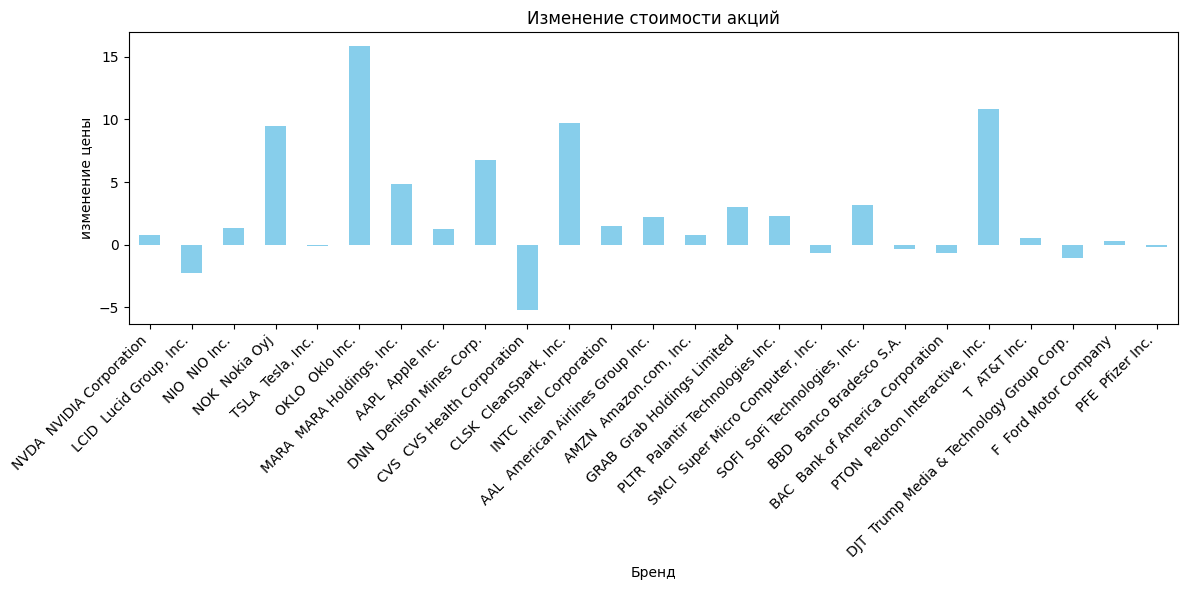

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#6.Анализ данных.

df.plot(kind='bar', x='Symbol', y='Change %', legend=False, color='skyblue', figsize=(12, 6))
plt.title('Изменение стоимости акций')
plt.xlabel('Бренд')
plt.ylabel('изменение цены')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Вывод:** года лидером роста цены акций является OKLO Oklo Inc.

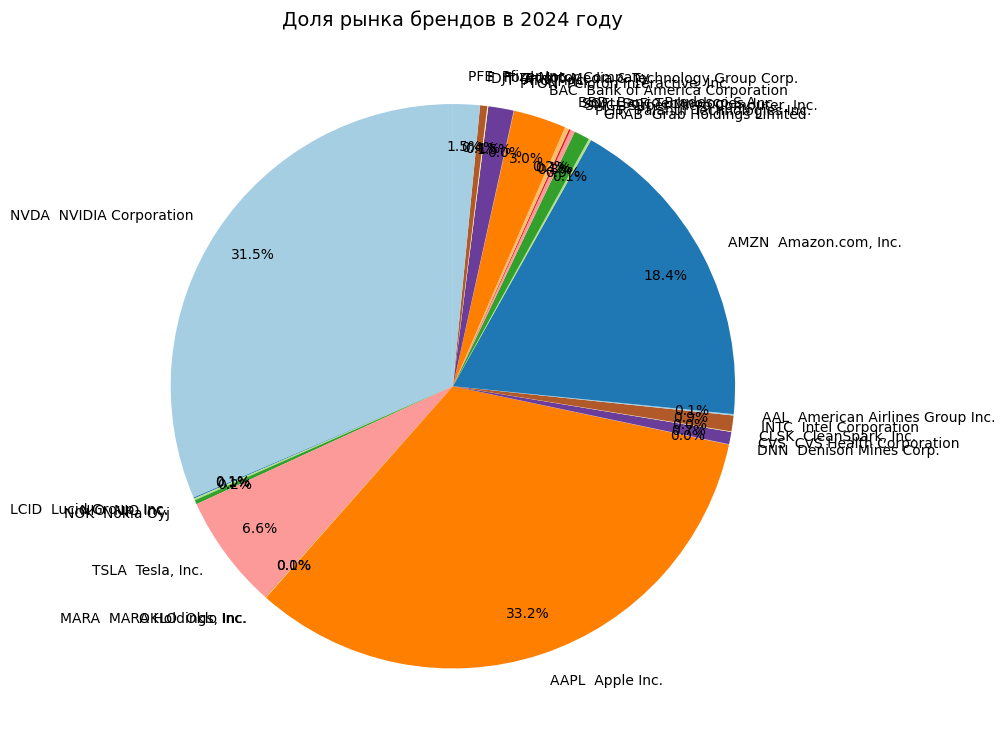

In [60]:
plt.figure(figsize=(10, 10))
plt.pie(df['Market Cap Numeric'], labels=df['Symbol'], autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired.colors,
        pctdistance=0.85, labeldistance=1.1)

plt.title('Доля рынка брендов в 2024 году', fontsize=14)
plt.tight_layout()
plt.show()

**Вывод:** На данный момент по капитализации Apple на первом месте